# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import os
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

637


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city).json()
#print(json.dumps(weather_response, indent=4, sort_keys=True))

In [66]:
# Setup empty response holder
cities_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index = 0
sets = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print('Beginning Data Retrival\n--------------------------------------------\n')

# Loop through city name in cities.
for index, city in enumerate(cities):
    index +=1
    try:
        weather_response = requests.get(query_url + city).json()
        cities_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response["wind"]["speed"])
        
        print(f"Processing Record {index} of Set {sets} | {city}")
        
        if index == 50:
            index= 0
            sets += 1
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrival
--------------------------------------------

Processing Record 1 of Set 1 | champerico
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | tokonou
Processing Record 4 of Set 1 | svetlyy
Processing Record 5 of Set 1 | chadiza
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | shingu
Processing Record 13 of Set 1 | thompson
City not found. Skipping...
Processing Record 15 of Set 1 | la libertad
Processing Record 16 of Set 1 | arawa
Processing Record 17 of Set 1 | moron
Processing Record 18 of Set 1 | soyo
Processing Record 19 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | marquette
Processing Record 23 of Set 1 | springdale
City not found. Skipping...
Processing Record 25 of S

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Create a data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : cities_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date                
})

weather_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [68]:
# Display DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Champerico,14.3000,-91.9167,64.00,93,0,7.07,GT,1612662661
1,Lüderitz,-26.6481,15.1594,67.42,70,0,22.70,NA,1612662656
2,Tokonou,9.6500,-9.7833,71.20,23,22,3.69,GN,1612662732
3,Tsimmerbude,54.6750,20.1347,21.99,85,0,2.24,RU,1612662733
4,Chadiza,-14.0678,32.4392,64.38,98,100,1.07,ZM,1612662733


In [69]:
# Export the city data into a .csv.
weather_df.to_csv("weather_output.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [70]:
humidity_test = weather_df.describe()
humidity_test

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.961411,20.177092,47.573737,75.673010,51.538062,8.340346,1.612663e+09
std,33.815262,91.456895,33.425365,17.347563,41.387664,6.064510,1.219701e+02
min,-54.800000,-179.166700,-42.000000,17.000000,0.000000,0.250000,1.612662e+09
25%,-7.259425,-60.747175,24.800000,66.000000,1.000000,3.600000,1.612663e+09
50%,22.936400,26.894300,60.000000,80.000000,52.500000,6.945000,1.612663e+09
75%,50.504125,102.462500,75.375000,88.000000,96.000000,11.412500,1.612663e+09
max,78.218600,178.416700,98.010000,100.000000,100.000000,34.520000,1.612663e+09


In [71]:
# Get the indices of cities that have humidity over 100%.
# check if there are any cities with >100% humidity
humidity_df = weather_df.loc[(weather_df["Humidity"] > 100), :]
humidity_df

print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data set!")

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data set!


In [72]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

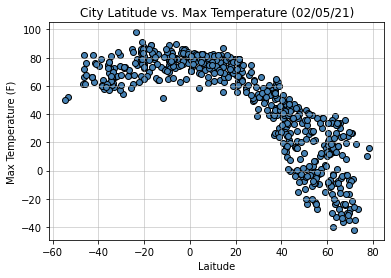

In [73]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/05/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

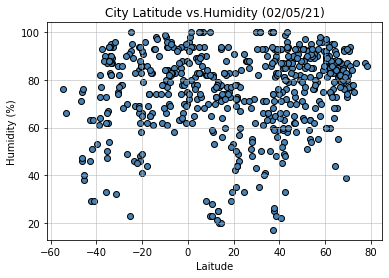

In [74]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs.Humidity (02/05/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

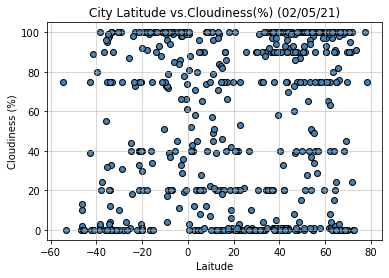

In [75]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs.Cloudiness(%) (02/05/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Cloudiness (%)")

## Latitude vs. Wind Speed Plot

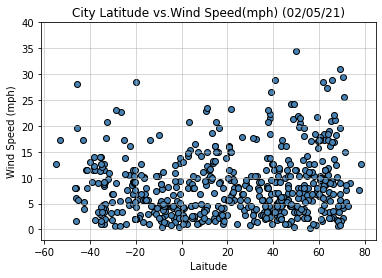

In [76]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs.Wind Speed(mph) (02/05/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set y axis limit
plt.ylim(-2,40)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Speed(mph).png")

## Linear Regression

In [77]:
def common_linear_reg_eqation(x_values, y_values , X_min_value , X_max_value, Y_min_value , Y_max_value , title_string ,XLabel, YLabel ):
   
    # Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.title(title_string)
    plt.xlabel(XLabel)
    plt.ylabel(YLabel )
    
    plt.ylim(Y_min_value, Y_max_value)
    plt.xlim(X_min_value,X_max_value)

    # Print r square value
    print(f"The r-value is: {rvalue}")
    print(f"The line equation is: {line_eq}")

    #plt.show()
    
    

In [78]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8678181495806424
The line equation is: y = -1.4x + 91.36


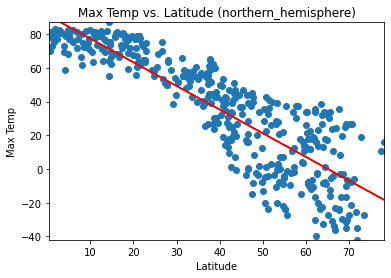

In [79]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
common_linear_reg_eqation(x_values, y_values , northern_hemisphere["Lat"].min() , northern_hemisphere["Lat"].max(),
                          northern_hemisphere["Max Temp"].min() , northern_hemisphere["Max Temp"].max() , 
                          "Max Temp vs. Latitude (northern_hemisphere)", 
                          "Latitude", "Max Temp" )

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4954386812326209
The line equation is: y = 0.33x + 81.2


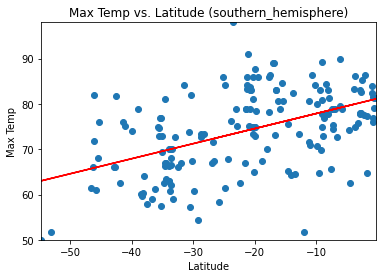

In [80]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
common_linear_reg_eqation(x_values, y_values , southern_hemisphere["Lat"].min() , southern_hemisphere["Lat"].max()
                          , southern_hemisphere["Max Temp"].min() , southern_hemisphere["Max Temp"].max() , "Max Temp vs. Latitude (southern_hemisphere)" 
                          ,"Latitude", "Max Temp" )

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21126000624127417
The line equation is: y = 0.18x + 68.71


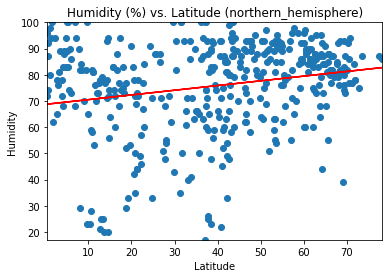

In [81]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
common_linear_reg_eqation(x_values, y_values , northern_hemisphere["Lat"].min() , northern_hemisphere["Lat"].max(),
                          northern_hemisphere["Humidity"].min() , northern_hemisphere["Humidity"].max() , 
                          "Humidity (%) vs. Latitude (northern_hemisphere)", 
                          "Latitude", "Humidity" )
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27535528084989874
The line equation is: y = 0.34x + 82.68


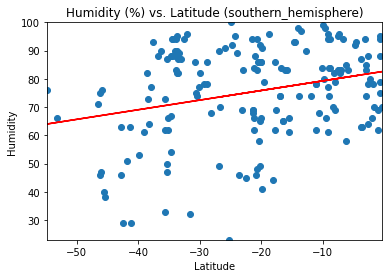

In [82]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
common_linear_reg_eqation(x_values, y_values , southern_hemisphere["Lat"].min() , southern_hemisphere["Lat"].max(),
                          southern_hemisphere["Humidity"].min() , southern_hemisphere["Humidity"].max() , 
                          "Humidity (%) vs. Latitude (southern_hemisphere)", 
                          "Latitude", "Humidity" )
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20441114298341592
The line equation is: y = 0.41x + 35.05


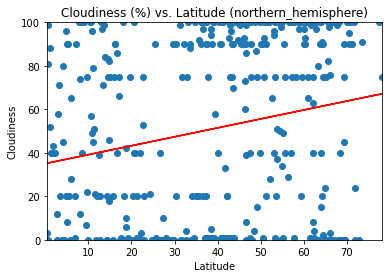

In [83]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
common_linear_reg_eqation(x_values, y_values , northern_hemisphere["Lat"].min() , northern_hemisphere["Lat"].max(),
                          northern_hemisphere["Cloudiness"].min() , northern_hemisphere["Cloudiness"].max() , 
                          "Cloudiness (%) vs. Latitude (northern_hemisphere)", 
                          "Latitude", "Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3758017293680601
The line equation is: y = 1.13x + 76.37


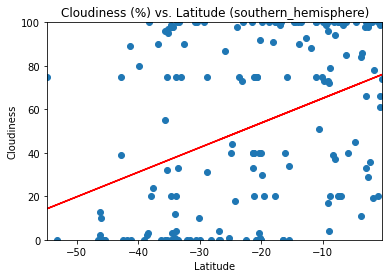

In [84]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
common_linear_reg_eqation(x_values, y_values , southern_hemisphere["Lat"].min() , southern_hemisphere["Lat"].max(),
                          southern_hemisphere["Cloudiness"].min() , southern_hemisphere["Cloudiness"].max() , 
                          "Cloudiness (%) vs. Latitude (southern_hemisphere)", 
                          "Latitude", "Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13610961380127284
The line equation is: y = 0.04x + 7.15


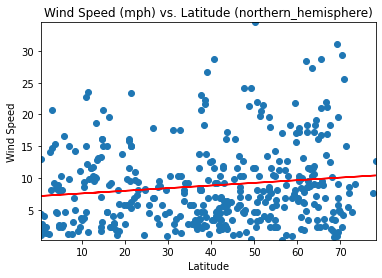

In [85]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
common_linear_reg_eqation(x_values, y_values , northern_hemisphere["Lat"].min() , northern_hemisphere["Lat"].max(),
                          northern_hemisphere["Wind Speed"].min() , northern_hemisphere["Wind Speed"].max() , 
                          "Wind Speed (mph) vs. Latitude (northern_hemisphere)", 
                          "Latitude", "Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2892450527366916
The line equation is: y = -0.11x + 4.91


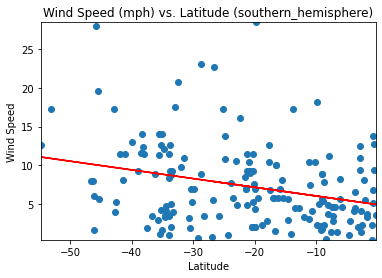

In [86]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
common_linear_reg_eqation(x_values, y_values , southern_hemisphere["Lat"].min() , southern_hemisphere["Lat"].max(),
                          southern_hemisphere["Wind Speed"].min() , southern_hemisphere["Wind Speed"].max() , 
                          "Wind Speed (mph) vs. Latitude (southern_hemisphere)", 
                          "Latitude", "Wind Speed")
plt.show()

#### Observation 1: Higher the latitude, lower the tempreature in Northern hemisphere. 

#### Observation 2: Cloudiness doesn't show any relationship with latitude.

#### Observation 3: The wind speed is mostly between 0 to 15 mph.